## OVERVIEW
---
* Data Visualization
* Feature Selection and Data Cleaning
* Data Transformation with BoxCox
* Homoscedasticity Check
* Predictictive Modelling
 * Random Forest Regressor
 * Linear Regression
* Metrics Comparison of Predictive Models
 * MAE, MSE & RMSE
 * Mean Absolute Percentage Error

In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

from scipy.stats import norm
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings('ignore')


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [6]:
#get the data
df_train = pd.read_csv('train.csv')

### DATA BASIC INFORMATION
---

In [7]:
#show df
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
#dataset shape
print('DATASET SHAPE: ', df_train.shape)

DATASET SHAPE:  (1460, 81)


In [8]:
#show data basic stats info
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [16]:
#show stats of saleprice feature
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## EDA
---

### DISTRIBUTION PLOT

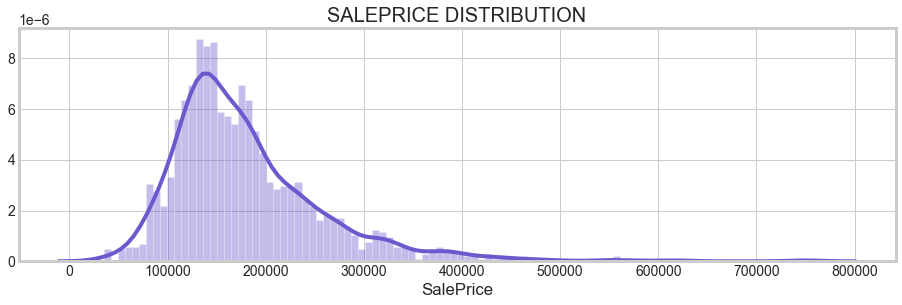

In [24]:
plt.figure(figsize=(14,4))
plt.title('SALEPRICE DISTRIBUTION', fontsize=20)
sns.distplot(df_train['SalePrice'], bins=100, color='slateblue', kde=True)


In [12]:
#Skewness and Kurtosis
print('Skewness: %f' % df_train['SalePrice'].skew())
print('Kurtosis: %f' % df_train['SalePrice'].kurt())


Skewness: 1.882876
Kurtosis: 6.536282


### INSIGHTS
---
* The Stock price distribution is positively skewed, which mean the measures are dispersed.
* The Distribution may be expressed as (Mean  >  Median  >  Mode).

### FEATURE SELECTION
---

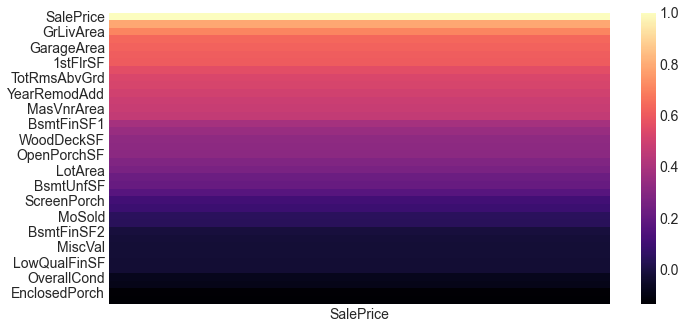

In [46]:
#plot a cluster map
plt.figure(figsize=(10,5))
sns.heatmap(pd.DataFrame(df_train.corr()['SalePrice'].sort_values(ascending=False)), cmap='magma')

* From the plot above, features from the y-axis are highly correlated to SalePrice.

In [48]:
k = 10 #get top 10 features that is highly correlated to target 
corrmat = df_train.corr()
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

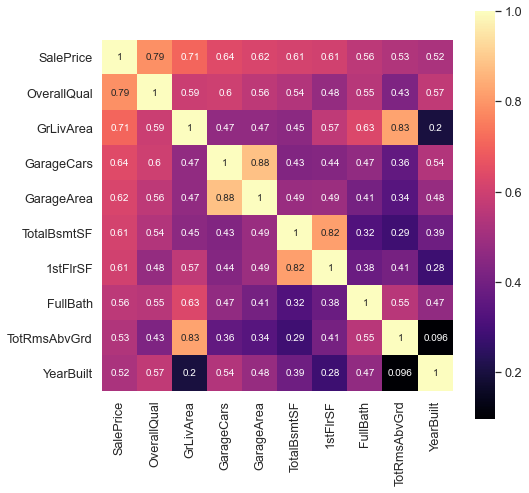

In [52]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.15)
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, cbar=True,square=True,cmap='magma', annot_kws={'size':10}, yticklabels=cols, xticklabels=cols)

In [49]:
#print the top 10 highly correlated features to the target
corrmat.nlargest(k, 'SalePrice')['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

#### PAIRPLOT OF HIGHLY CORRELATED FEATURES

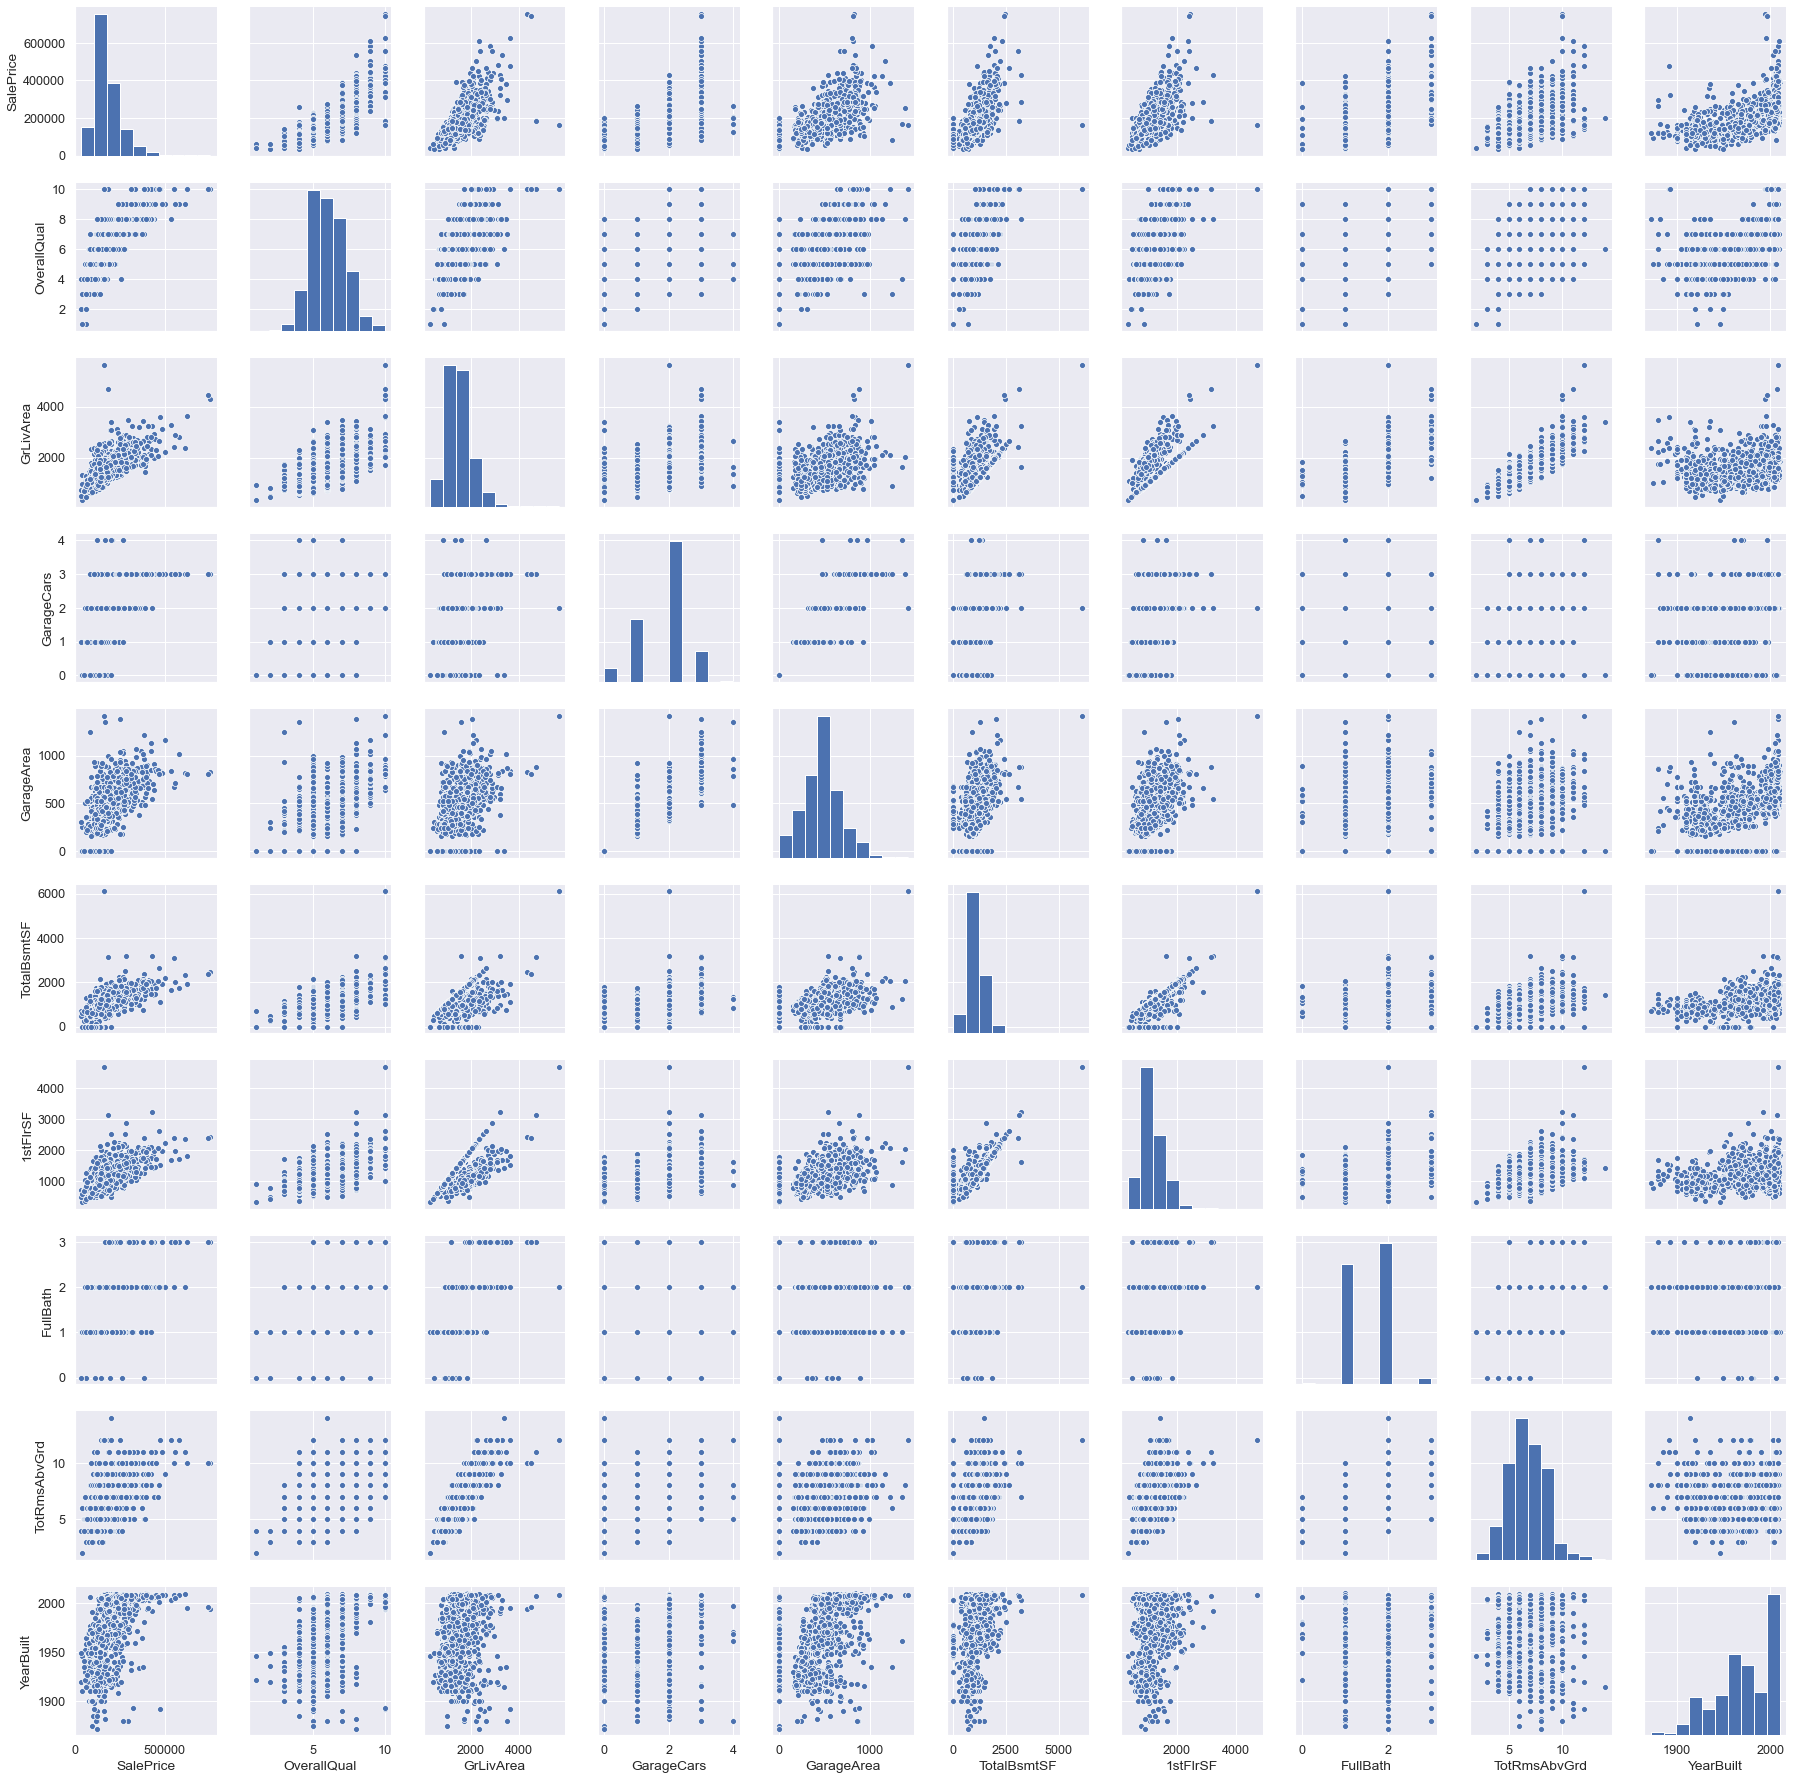

In [53]:
sns.pairplot(df_train[cols], size=2.5)

### INSIGHTS
---
* GrLivArea, TotalBsmtSF and OverallQual are Linearly related to SalePrice

### BI-VARIATE ANALYSIS
---

#### GrLivArea vs SalePrice

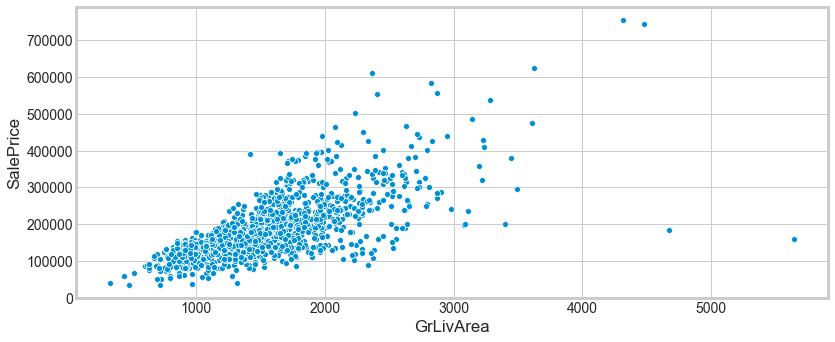

In [25]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])

#### TotalBsmtSF vs SalePrice

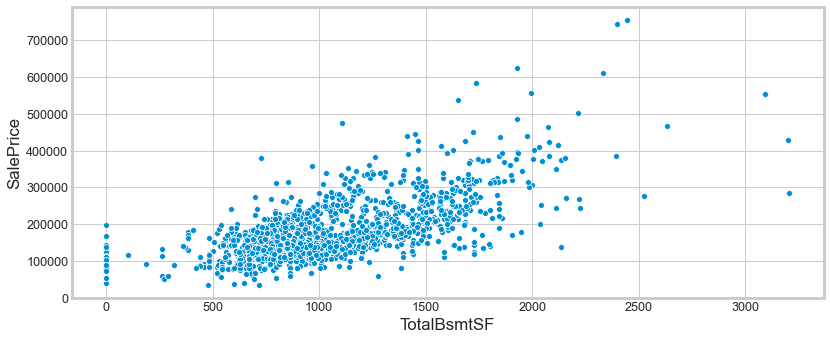

In [75]:
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_train['TotalBsmtSF'], y=df_train['SalePrice'])

#### OverallQual vs SalePrice

(-0.5, 9.5, 0.0, 800000.0)

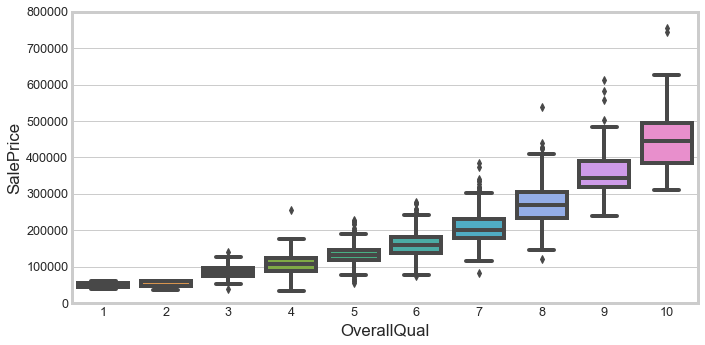

In [77]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['OverallQual'], y=df_train['SalePrice']).axis(ymin=0, ymax=800000)

### INSIGHTS
---
* OverallQual is highly linear to SalePrice.
* High overall quality house is expensive.

#### SalePrice and YearBuilt

(-0.5, 111.5, 0.0, 800000.0)

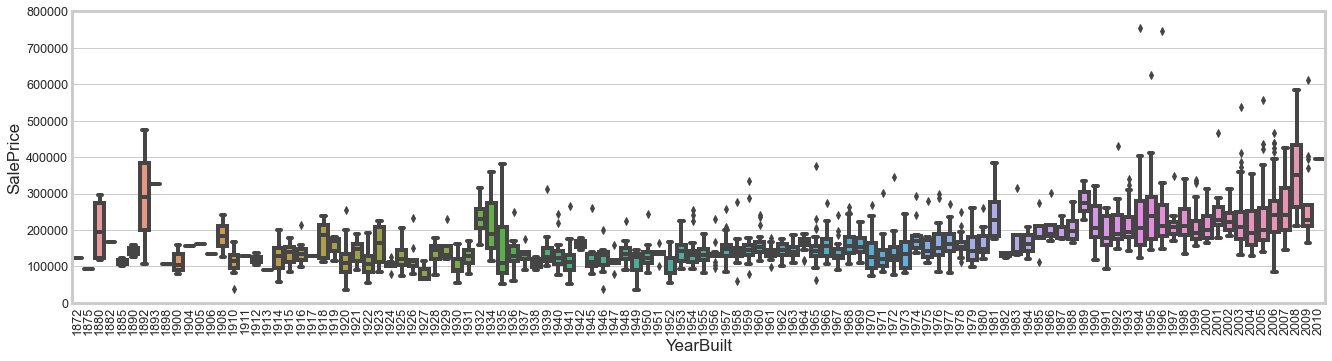

In [78]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
sns.boxplot(x=df_train['YearBuilt'], y=df_train['SalePrice']).axis(ymin=0, ymax=800000)

### DATA CLEANING
---

#### CHECKING NULL VALUES

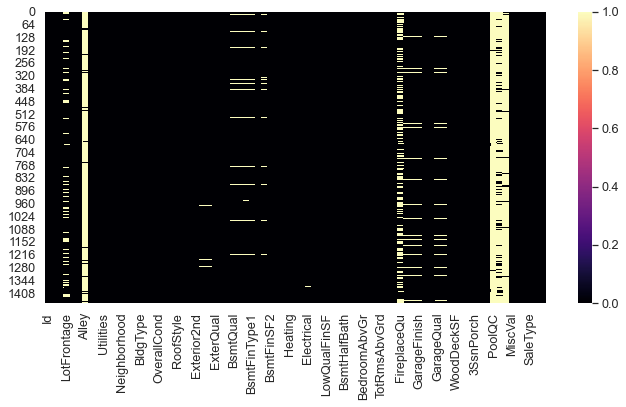

In [55]:
plt.figure(figsize=(10,5))
sns.heatmap(data=df_train.isnull(), cmap='magma')

In [57]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)

miss_data = pd.concat([total,percent], axis = 1, keys=['Total', 'Percent'])

#### MISSING DATA PERCENTAGE BY FEATURE

In [59]:
miss_data.head(20).T

,PoolQC,MiscFeature,Alley,Fence,FireplaceQu,LotFrontage,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual,MasVnrArea,MasVnrType,Electrical,Utilities
Total,1453.000000,1406.000000,1369.000000,1179.000000,690.000000,259.000000,81.000000,81.000000,81.000000,81.000000,81.000000,38.000000,38.000000,37.000000,37.000000,37.000000,8.000000,8.000000,1.000000,0.0
Percent,0.995205,0.963014,0.937671,0.807534,0.472603,0.177397,0.055479,0.055479,0.055479,0.055479,0.055479,0.026027,0.026027,0.025342,0.025342,0.025342,0.005479,0.005479,0.000685,0.0


In [64]:
df_train = df_train.drop((miss_data[miss_data['Total']>1] ).index, axis=1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

Number of Null Data:  0


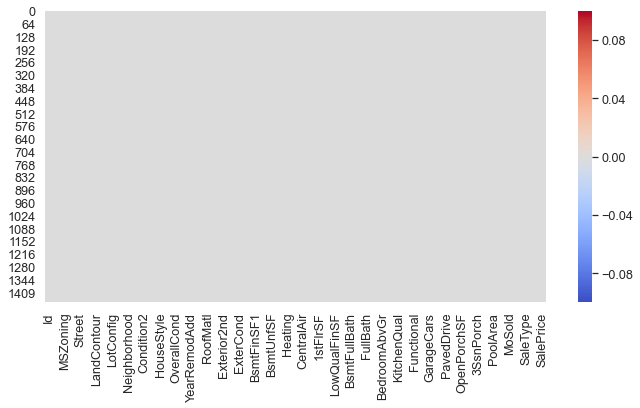

In [70]:
print('Number of Null Data: ',df_train.isnull().sum().max())

plt.figure(figsize=(10,5))
sns.heatmap(df_train.isnull(), cmap='coolwarm')

#### REMOVING OUTLIERS FROM GrLivArea

In [71]:
df_train.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [72]:
#delete id 1299 and 524
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

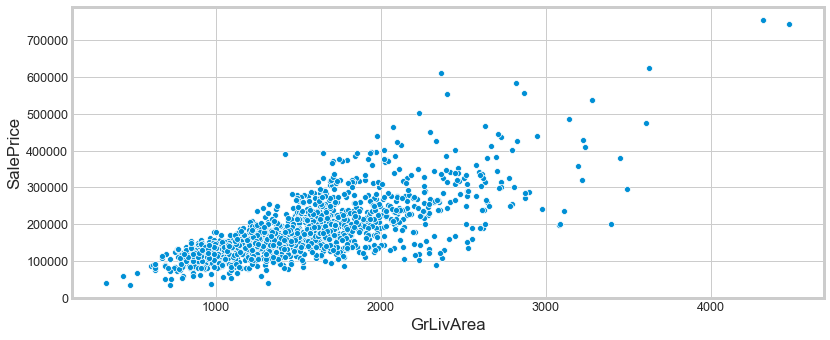

In [79]:
#New ScaterPlot of GrLivArea
plt.figure(figsize=(12,5))
sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'])

## DATA TRANSFORMATION
---

### TRANSFORMING SALEPRICE VALUES

Text(0.5, 1.0, 'PROBABILITY PLOT')

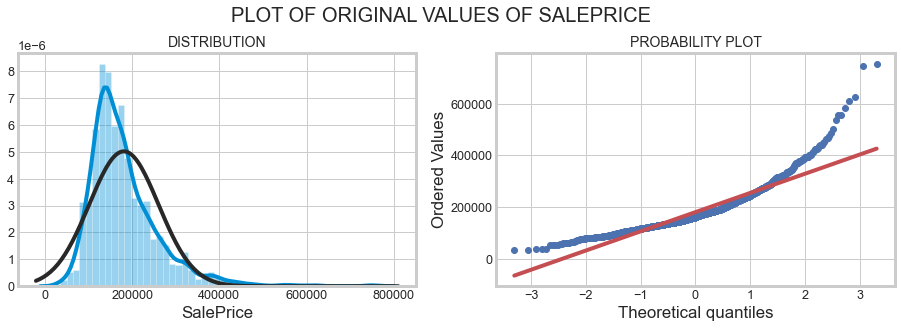

In [96]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
plt.suptitle('PLOT OF ORIGINAL VALUES OF SALEPRICE', fontsize=20, x=0.5,y=1.04)
sns.distplot(df_train['SalePrice'], fit=norm, ax=ax[0])
stats.probplot(df_train['SalePrice'], plot=ax[1])
ax[0].set_title('DISTRIBUTION', fontsize=14)
ax[1].set_title('PROBABILITY PLOT', fontsize=14)

#### BOXCOX TRANSFORMATION

In [97]:
#Applying Log Transformation on SalePrice
# df_train['SalePrice'] = np.log(df_train['SalePrice'])
sp_bcvalues, sp_ld = boxcox(df_train['SalePrice'])
df_train['SalePrice'] = sp_bcvalues

Text(0.5, 1.0, 'PROBABILITY PLOT')

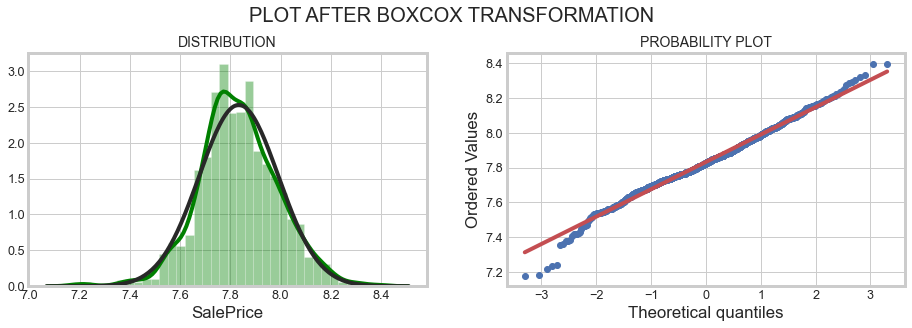

In [101]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
plt.suptitle('PLOT AFTER BOXCOX TRANSFORMATION', fontsize=20, x=0.5,y=1.04)
sns.distplot(df_train['SalePrice'], fit=norm, ax=ax[0], color='green')
stats.probplot(df_train['SalePrice'], plot=ax[1])
ax[0].set_title('DISTRIBUTION', fontsize=14)
ax[1].set_title('PROBABILITY PLOT', fontsize=14)

### GrLivArea TRANSFORMATION

Text(0.5, 1.0, 'PROBABILITY PLOT')

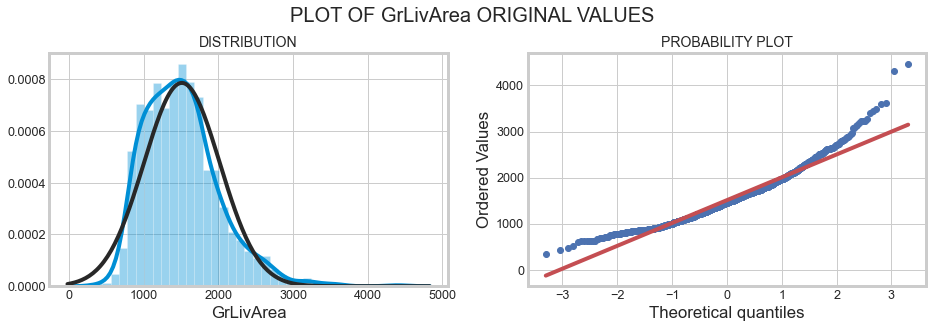

In [103]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
plt.suptitle('PLOT OF GrLivArea ORIGINAL VALUES', fontsize=20, x=0.5,y=1.04)
sns.distplot(df_train['GrLivArea'], fit=norm, ax=ax[0])
stats.probplot(df_train['GrLivArea'], plot=ax[1])
ax[0].set_title('DISTRIBUTION', fontsize=14)
ax[1].set_title('PROBABILITY PLOT', fontsize=14)

#### BOXCOX TRANSFORMATION

In [104]:
#Applying Log Transformation on GrLivArea
gr_bcvalues, gr_ld = boxcox(df_train['GrLivArea'])
df_train['GrLivArea'] = gr_bcvalues

Text(0.5, 1.0, 'PROBABILITY PLOT')

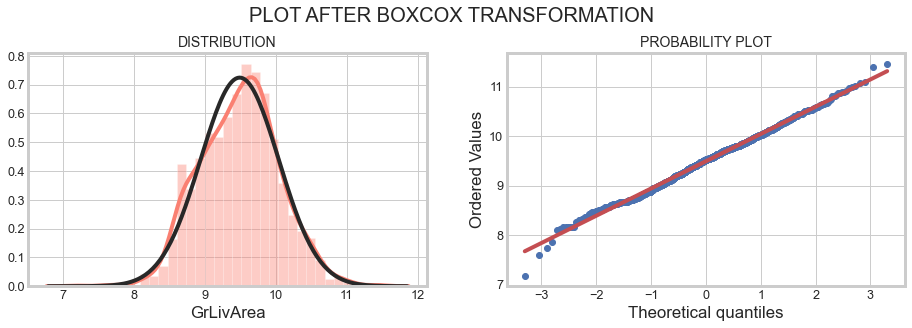

In [107]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
plt.suptitle('PLOT AFTER BOXCOX TRANSFORMATION', fontsize=20, x=0.5,y=1.04)
sns.distplot(df_train['GrLivArea'], fit=norm, ax=ax[0], color='salmon')
stats.probplot(df_train['GrLivArea'], plot=ax[1])
ax[0].set_title('DISTRIBUTION', fontsize=14)
ax[1].set_title('PROBABILITY PLOT', fontsize=14)

### TotalBsmtSF TRANSFORMATION

Text(0.5, 1.0, 'PROBABILITY PLOT')

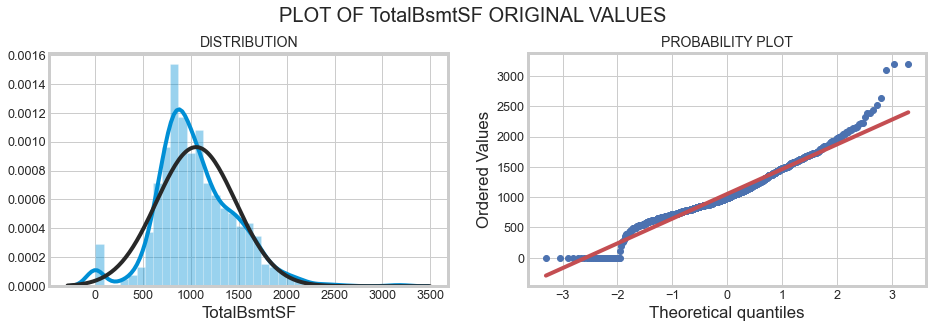

In [106]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
plt.suptitle('PLOT OF TotalBsmtSF ORIGINAL VALUES', fontsize=20, x=0.5,y=1.04)
sns.distplot(df_train['TotalBsmtSF'], fit=norm, ax=ax[0])
stats.probplot(df_train['TotalBsmtSF'], plot=ax[1])
ax[0].set_title('DISTRIBUTION', fontsize=14)
ax[1].set_title('PROBABILITY PLOT', fontsize=14)

#### BOXCOX TRANSFORMATION

In [120]:
#imputing a value on non-positive data
df_train['TotalBsmtSF'] = [num+1 for num in df_train['TotalBsmtSF']]

In [121]:
tb_bcvalues, tb_ld = boxcox(df_train['TotalBsmtSF'])
df_train['TotalBsmtSF'] = tb_bcvalues

Text(0.5, 1.0, 'PROBABILITY PLOT')

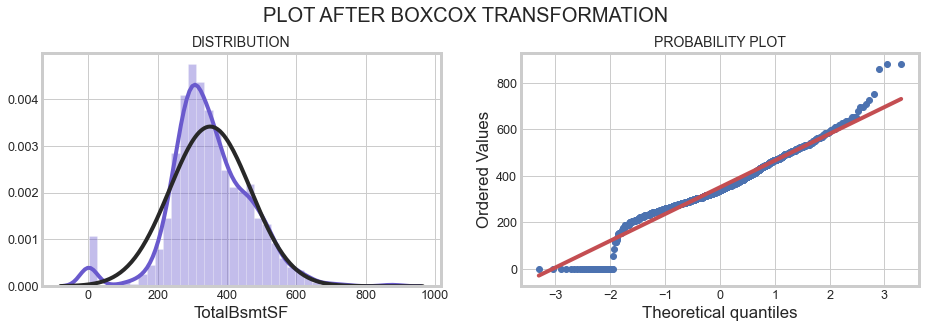

In [122]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
plt.suptitle('PLOT AFTER BOXCOX TRANSFORMATION', fontsize=20, x=0.5,y=1.04)
sns.distplot(df_train['TotalBsmtSF'], fit=norm, ax=ax[0], color='slateblue')
stats.probplot(df_train['TotalBsmtSF'], plot=ax[1])
ax[0].set_title('DISTRIBUTION', fontsize=14)
ax[1].set_title('PROBABILITY PLOT', fontsize=14)

### HOMOSCEDASTICITY CHECK
---

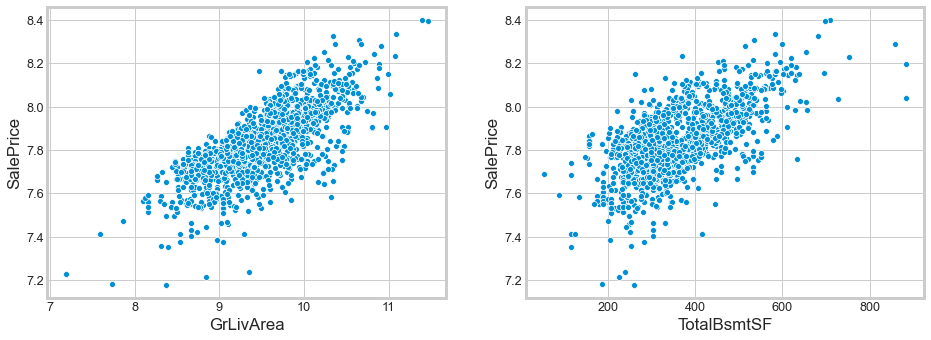

In [131]:
fig, ax = plt.subplots(1,2,figsize=(14,5))

sns.scatterplot(x=df_train['GrLivArea'], y=df_train['SalePrice'], ax=ax[0])
sns.scatterplot(x=df_train[df_train['TotalBsmtSF']>1]['TotalBsmtSF'], y=df_train['SalePrice'],ax=ax[1])

### INSIGHTS
---
* By transforming the data and ensuring normality, Homoscedasticyty is solved.

#### GET DUMMIES FOR CATEGORICAL FEATURES

In [132]:
data = pd.get_dummies(df_train, drop_first=True)

In [136]:
#show new dataframe
data.head()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,0,1,0,0,0,1,0


## MACHINE LEARNING
---

#### SPLITTING THE DATA

In [143]:
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### LINEAR REGRESSION

In [146]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [147]:
#get predictions
predictions = lr.predict(X_test)

In [151]:
#inverse transfor boxcox
def invboxcox(y,ld):
    if ld == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(ld*y+1)/ld))

In [152]:
#get the true value
y_true = invboxcox(y_test, sp_ld)
predictions = invboxcox(predictions,sp_ld)

#### TRUE VALUE AND PREDICTION COMPARISON

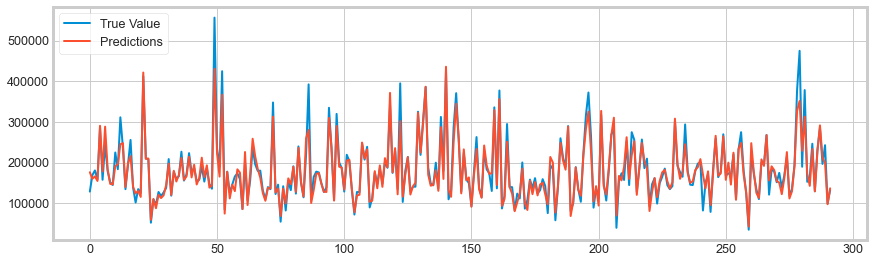

In [176]:
plt.figure(figsize=(13,4))
plt.plot(np.arange(len(y_true)),y_true, lw=2)
plt.plot(np.arange(len(y_true)),predictions, lw=2)
plt.legend(['True Value', 'Predictions'])

In [173]:
#show comparison on dataframe
lr_df = pd.DataFrame(columns=['True Value', 'LR Predictions'])
lr_df['True Value'], lr_df['LR Predictions'] = y_true, predictions
lr_df

,True Value,LR Predictions
666,129000.0,176529.480951
104,169500.0,160543.814505
1108,181000.0,166321.604372
18,159000.0,155121.279970
1024,287000.0,290730.325278
...,...,...
189,286000.0,291741.133440
1089,197000.0,212188.208913
175,243000.0,200050.354401
1257,99900.0,97953.273780


#### (MAE, MASE, RMSE)

In [179]:
lr_mae = mean_absolute_error(y_true, predictions)
lr_mse = mean_squared_error(y_true, predictions)
lr_rmse = np.sqrt(mean_squared_error(y_true, predictions))

print('Mean Absolute Error:   ', lr_mae)
print('Mean Squared Error:   ', lr_mse)
print('Root Mean Squared Error:   ', lr_rmse)

Mean Absolute Error:    13720.867905925128
Mean Squared Error:    491385294.1237959
Root Mean Squared Error:    22167.212141444306


#### MEAN ABSOLUTE PERCENTAGE ERROR

In [181]:
lr_error_rate = abs(((y_true - predictions) / y_true).mean()) * 100
print('MAPE: ', round(lr_error_rate,2), '%')

MAPE:  0.21 %


### RANDOM FOREST REGRESSOR
---

In [182]:
rf = RandomForestRegressor()
#fit the traning data
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [184]:
predictions = rf.predict(X_test)
#inverse transform
predictions = invboxcox(predictions, sp_ld)

#### TRUE VALUE AND PREDICTION COMPARISON

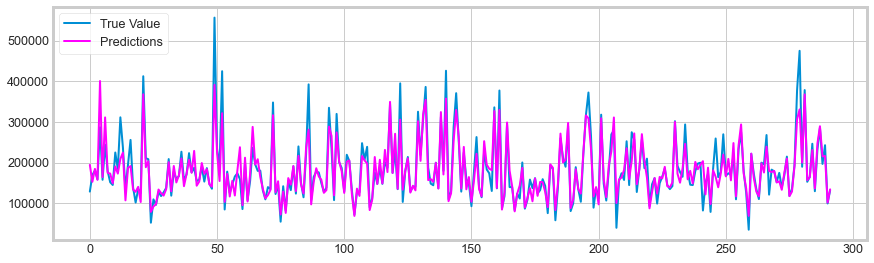

In [195]:
plt.figure(figsize=(13,4))
plt.plot(np.arange(len(y_true)),y_true, lw=2)
plt.plot(np.arange(len(y_true)),predictions, lw=2, color='magenta')
plt.legend(['True Value', 'Predictions'])

#### (MAE, MSE, RMSE)

In [196]:
rf_mae = mean_absolute_error(y_true, predictions)
rf_mse = mean_squared_error(y_true, predictions)
rf_rmse = np.sqrt(mean_squared_error(y_true, predictions))

print('Mean Absolute Error:   ', rf_mae)
print('Mean Squared Error:   ', rf_mse)
print('Root Mean Squared Error:   ', rf_rmse)

Mean Absolute Error:    18468.458393256602
Mean Squared Error:    894667243.565598
Root Mean Squared Error:    29910.988675829456


#### MEAN ABSOLUTE PERCENTAGE ERROR

In [197]:
rf_error_rate = abs(((y_true - predictions) / y_true).mean()) * 100
print('MAPE: ', round(rf_error_rate,2), '%')

MAPE:  1.8 %
